
## Diabet kasalligi tashxisini qo'yuvchi Sun'iy Intellekt model yaratish loyihasi

### Vazifa
Quyidagi ma'lumotlar to'plami Hindistonning Qandli diabet va buyrak kasalliklari milliy institutidan olingan. Maqsad diagnostik o'lchovlar asosida bemorda diabet bor-yo'qligini taxmin qilishdir.
 
 
 Ushbu vazifani CRSIP-DM metodologiyasi yordamida bajaramiz
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

### 1-qadam. Faoliyatni o'rganish
*  Tibbiyotning ushbu soha mutaxassislari bilan muloqot qilib diabet kasalligi haqida yetarlicha bilim va tushunchalar olamiz
*  Sohada qo'llaniladigan atama va tushunchalar haqida ma'lumotlar olamiz
*  Mavjud muammo va qo'yilayotgan talablarga aniqlik kiritamiz
*   Muammoga yechim berishda bir necha qismlardan iborat reja tuzamiz

### 2-qadam. Ma'lumotlarni o'rganish

In [1]:
import numpy as np
import pandas as pd

ModuleNotFoundError: No module named 'numpy'

In [ ]:
# Datasetni yuklab olamiz

url = 'https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/refs/heads/main/diabetes.csv'
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Ustunlar ta'riflari
* `Pregnancies` - homilador bo'lish soni
* `Glucose` - glyukozaga test natijasi
* `BloodPressure` -  diastolik qon bosimi (mm Hg)
* `SkinThickness` - Triceps teri burmasining qalinligi (mm)
* `Insulin` - 2 soatlik sarum insulini (mu U/ml)
* `BMI` - Tana massasi indeksi (vazn kg / (m bo'yi) ^ 2)
* `DiabetesPedigreeFunction` - diabetning naslchilik funktsiyasi
* `Age` - Yosh (yil)
* `Outcome` - Class (0 - diabet yo'q, 1 - diabet)

##### Outcome datasetda label (y) mo'ljal ekan, bu ustun `0` va `1` kategoriyalardan tashkil topgan

In [ ]:
print(f"Qatorlar va ustunlar soni: {df.shape}")

Qatorlar va ustunlar soni: (768, 9)


In [ ]:
# dataset haqida ma'lumotlar
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# raqamli ustunlar haqida ma'lumotlar
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# NaN qiymatlar mavjudligini tekshirish
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Outcome ustun qiymatlari soni
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

 Muvozanat buzilgan, kategoriyalar soni farqi katta. Bu holat modelni qo'pol xatolar qilishga va bir tomonga og'ishiga olib keladi
 ##### Yechim:      
 `1` kategoriyali ma'lumotlarni yig'ish yoki `0` kategoriayali elementlarni sonini kamaytirish va tenglashtirish
 

#### Xossalar bir-biriga bogliqligini tekshirish

In [ ]:
# Umumiy korrelyatsiya
correl_matrix = df.corr().abs()
correl_matrix.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
# Barcha ustunlarning Outcome ustuni bilan korrelyatsiyasi
df.corrwith(df['Outcome']).sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

### 3-qadam. Ma'lumotlarni tahrirlash

In [ ]:
# dataset ustunlari nomlarini tahrirlashga qulay ko'rinishga keltirish
column_names = df.columns
df.columns = column_names.str.lower()

In [ ]:
# Outcome elementlarini tenglashtirish, 232ta 0 elemntlarni tashlab yuboramiz
idx = df[df['outcome']==0].sample(232).index
df.drop(idx, inplace=True)

In [ ]:
# Outcome elementlar muvozanatini tekshirish
df['outcome'].value_counts()

outcome
1    268
0    268
Name: count, dtype: int64

### 4-qadam. Ma'lumotlarni ML ga tayyorlash

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Parametr va labelga ajratish
X = df.drop('outcome', axis=1)
y = df['outcome'].copy()

# ma'lumotlarni standartizatsiya qilish
scaler = StandardScaler()
X = scaler.fit_transform(X.values)

# train va test qismlarga ajratish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

### 5-qadam. Klassificator model yaratish

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# eng yaxshi k ni topish
param_grid = {'n_neighbors':np.arange(1,25)}

knn_gscv = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
# umumiy natijalar`
knn_gscv.cv_results_

{'mean_fit_time': array([0.00362105, 0.00339494, 0.0032876 , 0.00338535, 0.00350866,
        0.00315571, 0.00317202, 0.00320902, 0.00334721, 0.00329294,
        0.00305877, 0.00315027, 0.00324731, 0.00319371, 0.00305929,
        0.00331817, 0.00319915, 0.00324769, 0.00352769, 0.00313697,
        0.0032567 , 0.00318127, 0.00323238, 0.00316224]),
 'std_fit_time': array([9.14043207e-04, 4.09024805e-04, 1.59520909e-04, 3.76515204e-04,
        5.37257943e-04, 1.46110095e-04, 1.81290239e-04, 2.81317015e-04,
        3.82282803e-04, 3.07727761e-04, 3.84765337e-05, 1.25400956e-04,
        3.28036150e-04, 2.54222751e-04, 9.83404937e-05, 5.59908165e-04,
        1.64707340e-04, 2.35585421e-04, 5.23346353e-04, 1.07399417e-04,
        3.21686999e-04, 1.94211823e-04, 3.47630137e-04, 1.68455818e-04]),
 'mean_score_time': array([0.02325869, 0.01825595, 0.01983638, 0.01916203, 0.01819668,
        0.01874475, 0.01826057, 0.01950474, 0.01901073, 0.0188313 ,
        0.01836233, 0.01905603, 0.01877699, 0.01

In [ ]:
# eng yaxshi k qiymat
knn_gscv.best_params_

{'n_neighbors': np.int64(23)}

In [ ]:
# eng k ni yaxshi accuracy score
knn_gscv.best_score_

np.float64(0.6990979381443299)

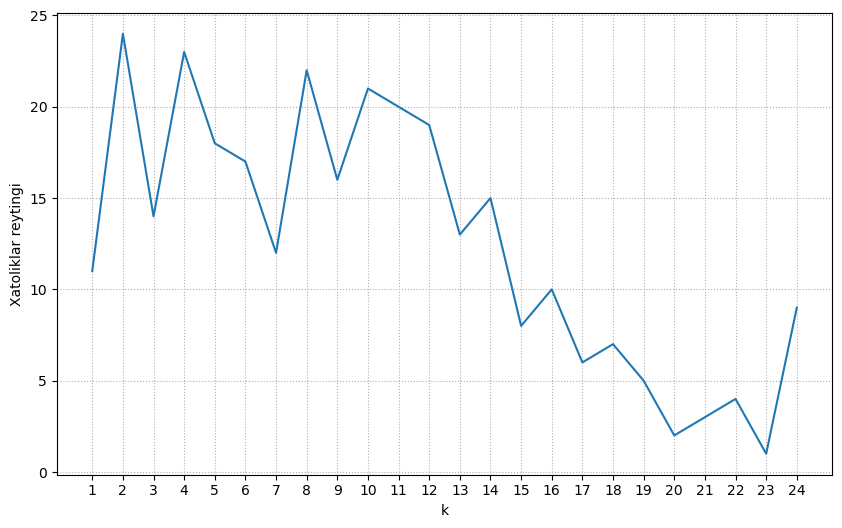

In [ ]:
# eng yaxshi k ni chizmada tasvirlash

plt.figure(figsize=(8,5))
plt.plot(range(1,25), knn_gscv.cv_results_['rank_test_score'])
plt.xticks(range(1,25))
plt.xlabel('k')
plt.ylabel('Xatoliklar reytingi')
plt.grid(linestyle=':')
plt.show()

In [ ]:
# model yaratish va uni o'qitish
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

### 6-qadam. Modelni baholash

In [ ]:
from sklearn.metrics import jaccard_score, confusion_matrix

# jaccard_score yordamida baholash
print(f"Jaccard_score natija: {jaccard_score(y_test, prediction)}")

Jaccard_score natija: 0.6774193548387096


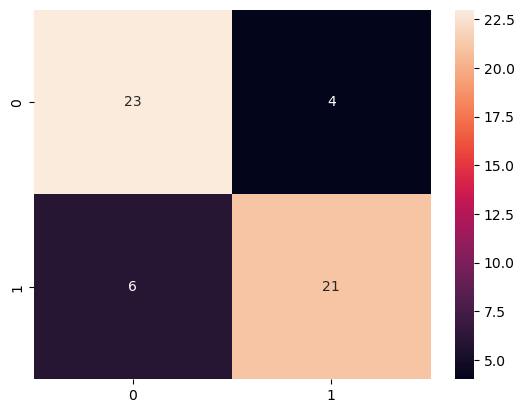

In [ ]:
# confusion_matrics tahlili
matrix = confusion_matrix(y_test, prediction)
sns.heatmap(matrix, annot=True)
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# precision, recall, accuracy va f1_score natijalarni qo'lda hisoblash
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)
accuracy = accuracy_score(y_test, prediction)

print(f"{precision = } \n{recall = } \n{f1 = } \n{accuracy = }")

precision = 0.84 
recall = 0.7777777777777778 
f1 = 0.8076923076923077 
accuracy = 0.8148148148148148


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# cross_val_predict yordamida baholash 
cv_predict = cross_val_predict(estimator=knn, X=X, y=y, cv=5)

# cross_val_predict natijalari
print(classification_report(y, cv_predict))

ModuleNotFoundError: No module named 'sklearn'

### 7-qadam. Taqdimot
Loyihani ishga tushirib, buyurtmachining fikr va mulohazalariga qarab loyihani taqdim qilish mumkin yoki ortga 2-qadamgacha qaytib, loyihani qayta ishlab chiqib, yuqoriroq natija bilan qayta taqdimot qilinadi. Loyiha talabga javob bersa topshiriladi